In [85]:
from qiskit import *
from qiskit.visualization import *
import math
from qiskit.circuit.library import QFT
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import qiskit

In [86]:
# defining a general Uf gate
def Uf(a,qc,q):
    for i in range(len(a)):
        if a[i]=='0':
            qc.x(q[len(a)-1-i])
            
    qc.mcx(list(range(0,q.size-1)),q[q.size-1])
    
    for i in range(len(a)):
        if a[i]=='0':
            qc.x(q[len(a)-1-i])

In [87]:
# our new "oracle"
def U(qc, q):
    num = ['001','011','101']
    for i in num:
        Uf(i,qc,q)

In [88]:
# defining W
def W(qc,q):
    for i in range(q.size-1):
        qc.h(q[i])
        qc.x(q[i])
        
    qc.h(q[q.size-2])
    qc.mcx(list(range(0,q.size-2)),q[q.size-2])
    qc.h(q[q.size-2])
    
    for i in range(q.size-1):
        qc.x(q[i])
        qc.h(q[i])

1.282549830161864


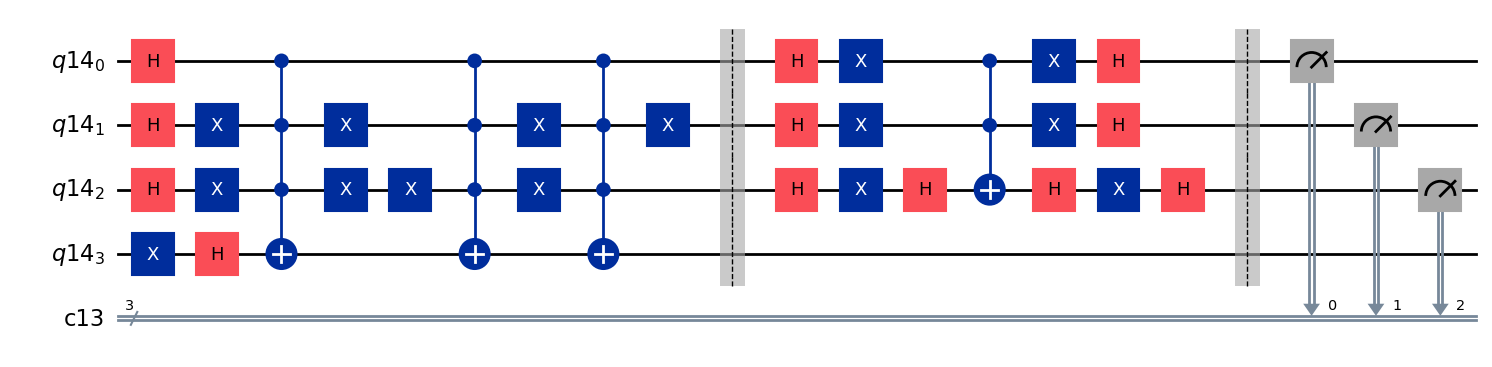

In [89]:
# Grover search!
n = 3
m = 3
# create the quantum circuit
qreg1 = QuantumRegister(n+1)
creg1 = ClassicalRegister(n)
qcircuit = QuantumCircuit(qreg1,creg1)
# initialize the one state in the ancillary qubit
qcircuit.x(qreg1[qreg1.size-1])
# put all the qubits in superposition (changes ancillary to minus state)
qcircuit.h(qreg1)

# number of Grover's search iterations
iterations = (math.pi/4)*math.sqrt(2**(n)/m)
print (iterations)

for i in range(round(iterations)):
    U(qcircuit, qreg1)
    qcircuit.barrier()
    W(qcircuit, qreg1)
    qcircuit.barrier()
    
qcircuit.measure(qreg1[0:qreg1.size-1],creg1)
qcircuit.draw(output="mpl") # draws out your quantum circuit

{'101': 284, '000': 37, '001': 300, '011': 274, '010': 32, '111': 39, '100': 27, '110': 31}


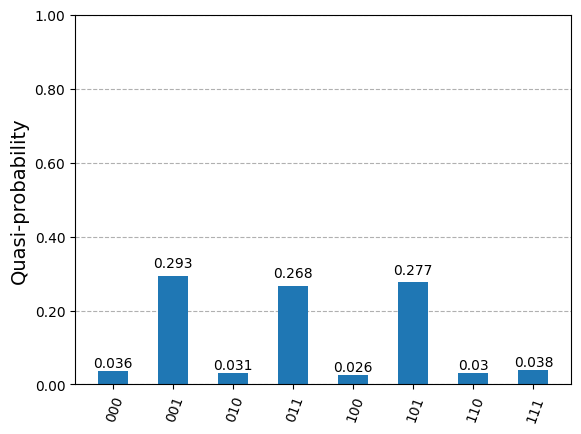

In [90]:
# Import section
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# For execution
simulator = AerSimulator()
compiled_circuit = transpile(qcircuit, simulator)
sim_result = simulator.run(compiled_circuit, shots=1024)
result = sim_result.result()
counts = result.get_counts(qcircuit)
print(counts)
fig, ax = plt.subplots()
plot_distribution(counts, ax=ax)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()
